Niharika Pandala

Step 1:
* Google account: niharikap13@gmail.com
* Google Drive: niharikap13@gmail.com
* GitHub: Niha002

Step 2
1. Link Google Collab to Google drive

In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Navigate to my Collab files directory
!ls
%cd drive
%cd MyDrive
%pwd
%cd Colab Notebooks
!ls

drive  sample_data
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
AI-class  Hw1_Python.ipynb  Hw2_code_Image.ipynb  lotus.jpg


Step 2
2. Link Google Collab to GitHub

In [5]:
# Made a git repo and cloning it using git clone below
!git clone https://github.com/Niha002/AI-class.git

fatal: destination path 'AI-class' already exists and is not an empty directory.


In [40]:
# Navigate to the Git repo called AI-class
!ls
%cd AI-class
!cd..
!pwd

Hw1_Code_Python.ipynb
[Errno 2] No such file or directory: 'AI-class'
/content/drive/MyDrive/Colab Notebooks/AI-class
/bin/bash: cd..: command not found
/content/drive/MyDrive/Colab Notebooks/AI-class


Step 2
3. Read some image files from your Google Drive 
4. process images (filtering)

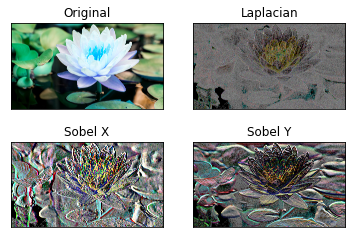

In [6]:
# Libraries to read a image 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Refer to Laplacian filters and Sobel filters in OpenCV

# read a image
img = cv.imread('lotus.jpg')

# perform laplacian filtering
laplacian = cv.Laplacian(img, cv.CV_64F)
# find vertical edge
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
# find horizontal edge
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=1)

# Plot as a subplot grid for comparision
# Original
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
# Laplacian
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
# Sobel X
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
# Sobel Y
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

Step 2
3. Read some image files from your Google Drive 
4. process images (histogram equalization)

(0.0, 256.0)

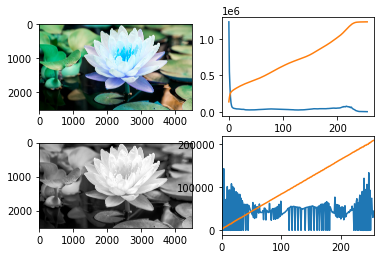

In [8]:
# Libraries to read a image 
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

# Original image
img = cv.imread('lotus.jpg')
# Gray scale image
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Original figure 
# Calculate Hist(img, 0 gray sclae, none= fullframe, bin, pixel)
hist = cv.calcHist([img],[0],None,[256],[0,256])
# CDF
cdf = hist.cumsum()
# Normalization of CDF
cdfnmhist = cdf * hist.max()/ cdf.max()

# Grayscale figure
# Histogram equalize improves image contrast(CDF)
eq = cv.equalizeHist(grayimg)
# Calculate Hist(img, 0 gray sclae, none= fullframe, bin, pixel)
histeq = cv.calcHist([eq],[0],None,[256],[0,256])
# CDF
cdfeq = histeq.cumsum()
# Normalization of CDF
cdfnmhisteq = cdfeq * histeq.max()/ cdf.max()

# Plot as a subplot grid for comparision
# Original
plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.plot(hist), plt.plot(cdfnmhist)
# Grayscale
plt.subplot(223), plt.imshow(eq,'gray')
plt.subplot(224), plt.plot(histeq), plt.plot(cdfnmhisteq)
plt.xlim([0,256])

# Dark regions on equalisation become brighter 
# Contrast improved using "equalizehist" hence  CDF linear 